In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import numpy as np
import matplotlib.pylab as plt

from matplotlib import rcParams
rcParams['figure.figsize'] = 15,6

from src import data
!date -I

2024-05-02


https://siibra-python.readthedocs.io/en/latest/examples/05_anatomical_assignment/001_coordinates.html

In [21]:
import pandas as pd

In [2]:
import siibra

[siibra:INFO] Version: 1.0a09
INFO:siibra:Version: 1.0a09
[siibra:WARNING] This is a development release. Use at your own risk.
[siibra:INFO] Please file bugs and issues at https://github.com/FZJ-INM1-BDA/siibra-python.
INFO:siibra:Please file bugs and issues at https://github.com/FZJ-INM1-BDA/siibra-python.


In [4]:
from nilearn import plotting

In [9]:
print(siibra.parcellations)

InstanceTable:
 - DEEP_WHITE_MATTER_FIBRE_BUNDLES
 - SUPERFICIAL_FIBRE_BUNDLES
 - CORTICAL_LAYER_SEGMENTATION_OF_THE_BIGBRAIN_MODEL
 - DIFUMO_ATLAS_1024_DIMENSIONS
 - DIFUMO_ATLAS_128_DIMENSIONS
 - DIFUMO_ATLAS_256_DIMENSIONS
 - DIFUMO_ATLAS_512_DIMENSIONS
 - DIFUMO_ATLAS_64_DIMENSIONS
 - DESIKAN_KILLIANY_ATLAS_2006
 - HARVARDOXFORD_CORT_MAXPROB_THR0
 - HARVARDOXFORD_CORT_MAXPROB_THR25
 - ISOCORTEX_SEGMENTATION
 - JULICH_BRAIN_CYTOARCHITECTONIC_ATLAS_V1_18
 - JULICH_BRAIN_CYTOARCHITECTONIC_ATLAS_V2_9
 - JULICH_BRAIN_CYTOARCHITECTONIC_ATLAS_V3_0_3
 - PRERELEASE_JULICH_BRAIN_CYTOARCHITECTONIC_ATLAS_V3_1
 - MARSATLAS_CORTICAL_PARCELLATION_MODEL
 - MEBRAINS_POPULATION_BASED_MONKEY_PARCELLATION
 - ALLEN_MOUSE_COMMON_COORDINATE_FRAMEWORK_V3_2015
 - ALLEN_MOUSE_COMMON_COORDINATE_FRAMEWORK_V3_2017
 - WAXHOLM_SPACE_ATLAS_OF_THE_SPRAGUE_DAWLEY_RAT_BRAIN_V1_01
 - WAXHOLM_SPACE_ATLAS_OF_THE_SPRAGUE_DAWLEY_RAT_BRAIN_V2
 - WAXHOLM_SPACE_ATLAS_OF_THE_SPRAGUE_DAWLEY_RAT_BRAIN_V3
 - WAXHOLM_SPACE_ATLAS

In [12]:
dk_map = siibra.get_map(
    parcellation="desikan killiany",
    space="mni152",
)
dk_map

<Map(identifier='siibra-map-v0.0.1_mni152-dk-labelled', name='mni152 dk labelled', species='Homo sapiens')>

In [14]:
dk_centroids = dk_map.compute_centroids()

Computing centroids: 100%|█████████████████| 68/68 [00:17<00:00,  3.87regions/s]


In [26]:
df = (pd.DataFrame()
 .assign(roi=dk_map.regions)
 .assign(x=lambda d : [ dk_centroids[r][0] for r in d.roi])
 .assign(y=lambda d : [ dk_centroids[r][1] for r in d.roi])
 .assign(z=lambda d : [ dk_centroids[r][2] for r in d.roi])
)
df

,roi,x,y,z
0,left entorhinal,-22.378111,-5.029085,-31.095052
1,right entorhinal,22.211649,-2.828987,-32.685743
2,left parahippocampal,-22.960137,-30.033906,-18.123711
3,right parahippocampal,24.213605,-28.463821,-18.370667
4,left fusiform,-34.086627,-42.102489,-21.575999
...,...,...,...,...
63,left frontalpole,-6.849294,65.388540,-8.583987
64,left temporalpole,-29.388793,12.457171,-35.593434
65,right bankssts,55.453003,-39.063183,7.923167
66,right frontalpole,8.600437,65.293122,-10.081878


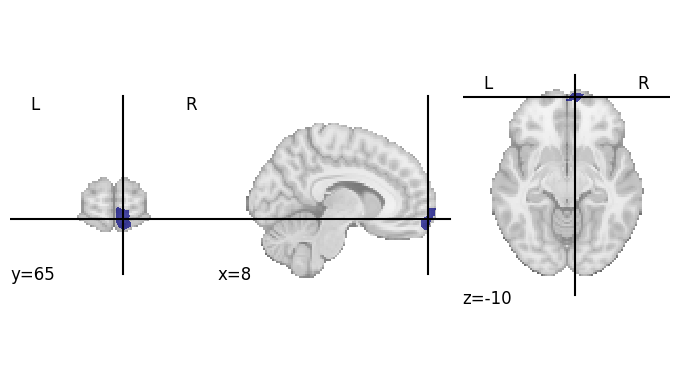

In [34]:
plotting.plot_roi(dk_map.fetch('right frontalpole'))

In [39]:
%mkdir -p {data.path('external/dk_parcellation_centroids')}

In [40]:
df.to_csv(data.path('external/dk_parcellation_centroids/dk_centroids.csv'), index=False)